[2025-05-09 Fiddler](https://thefiddler.substack.com/p/can-you-sweep-the-series)
====================

Fiddler
-------
Tabulating the probabilities

| result | probability |
|--------|-------------|
| 4-0    | $p^4$ |
| 4-1    | $p^4(1-p)\binom41$ |
| 4-2    | $p^4(1-p)^2\binom52$ |
| 4-3    | $p^4(1-p)^3\binom63$ |
| 3-4    | $p^3(1-p)^4\binom63$ |
| 2-4    | $p^2(1-p)^4\binom52$ |
| 1-4    | $p(1-p)^4\binom41$ |
| 0-4    | $(1-p)^4$ |

In [1]:
p = var('p')
(p^4 + p^4*(1-p)*binomial(4,1) + p^4*(1-p)^2*binomial(5,2)
 + p^4*(1-p)^3*binomial(6,3) + p^3*(1-p)^4*binomial(6,3)
 + p^2*(1-p)^4*binomial(5,2) + p*(1-p)^4*binomial(4,1) + (1-p)^4).expand()

1

Not sure if we are comparing winning 4-1 to winning 4-0, winning 4-2, winning 4-3, losing 3-4,
etc, or if we are comparing winning 4-1 to either winning or losing in 4, either winning or
losing in 6, etc.

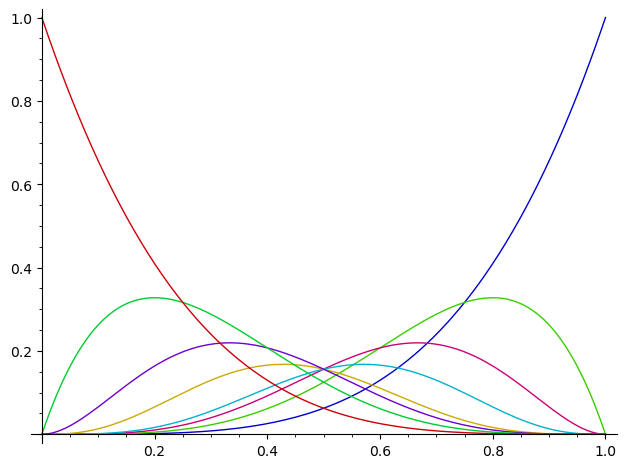

In [2]:
plot([p^4,p^4*(1-p)*binomial(4,1),p^4*(1-p)^2*binomial(5,2),
      p^4*(1-p)^3*binomial(6,3),p^3*(1-p)^4*binomial(6,3),
      p^2*(1-p)^4*binomial(5,2),p*(1-p)^4*binomial(4,1),(1-p)^4],p,0,1)

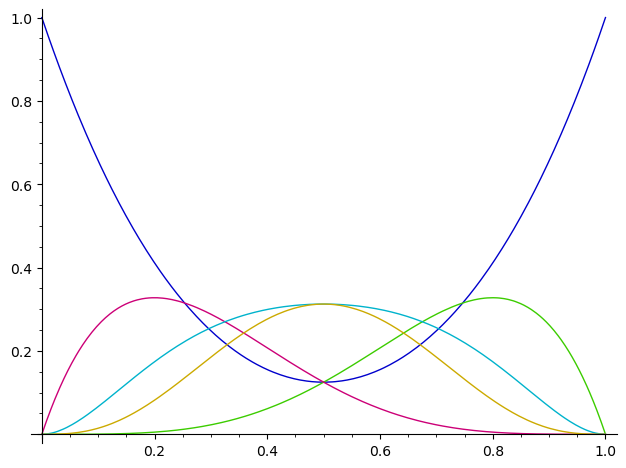

In [3]:
plot([p^4+(1-p)^4,
      p^4*(1-p)*binomial(4,1),
      p*(1-p)^4*binomial(4,1),
      (p^4*(1-p)^2 + p^2*(1-p)^4)*binomial(5,2),
      (p^4*(1-p)^3 + p^3*(1-p)^4)*binomial(6,3)],p,0,1)

Eyeballing, it looks like winning 4-1 is more likely than any other single outcome
when $0.6 \lesssim p \lesssim 0.75$, and is more likely than a sweep or a 6 game
series or a 7 game series when $0.67 \lesssim p \lesssim 0.74$.

For the first case,

In [4]:
b = solve(p^4*(1-p)*binomial(4,1) == p^4, p)[0].rhs()
a = solve(p^4*(1-p)*binomial(4,1) == p^4*(1-p)^2*binomial(5,2), p)[0].rhs()
(a,b)

(3/5, 3/4)

For the second case,

In [5]:
b = solve(p^4*(1-p)*binomial(4,1) == p^4+(1-p)^4,p)[1].rhs().simplify_full()
show(b)
a = solve(p^4*(1-p)*binomial(4,1) == (p^4*(1-p)^2 + p^2*(1-p)^4)*binomial(5,2),p)[2].rhs().simplify_full()
show(a)
print((numerical_approx(a),numerical_approx(b)))

-1/12*sqrt(6)*(sqrt((2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10*2^(1/3) + 4*(3*sqrt(23)*sqrt(3) - 11)^(1/3))/(3*sqrt(23)*sqrt(3) - 11)^(1/3)) - sqrt((6*sqrt(6)*2^(5/6)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) - (2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10*2^(1/3) - 8*(3*sqrt(23)*sqrt(3) - 11)^(1/3))*sqrt((2*2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) + 2^(1/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10)/(3*sqrt(23)*sqrt(3) - 11)^(1/3)))/((3*sqrt(23)*sqrt(3) - 11)^(1/3)*sqrt((2*2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) + 2^(1/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10)/(3*sqrt(23)*sqrt(3) - 11)^(1/3)))))

-1/40*4^(2/3)*(7*4^(2/3) - 6*4^(1/3)*(5*sqrt(10)*sqrt(3) + 8)^(1/3) - 2*(5*sqrt(10)*sqrt(3) + 8)^(2/3))/(5*sqrt(10)*sqrt(3) + 8)^(1/3)

(0.675178810415613, 0.746688688370143)


So the answer is either $a = 3/5$, $b = 3/4$, or $a \approx 0.675$, $b \approx 0.747$.

Extra credit
------------
Plotting $p_4$ and $p_7$,

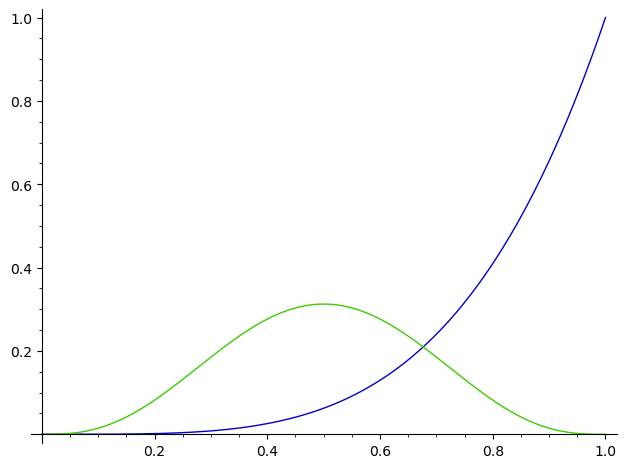

In [6]:
plot([p^4,(p^4*(1-p)^3+p^3*(1-p)^4)*binomial(6,3)],p,0,1)

Eyeballing, it looks like a 7 game series is more likely when $p \lesssim 0.68$.
Let $c = p$ when $p_4 = p_7$,

In [7]:
c = solve(p^4 == (p^4*(1-p)^3 + p^3*(1-p)^4)*binomial(6,3), p)[2].rhs()
show(c)
numerical_approx(c)

1/2*(1/225)^(1/3)*(2*sqrt(30)*sqrt(17) - 45)^(1/3) - 15/2*(1/225)^(2/3)/(2*sqrt(30)*sqrt(17) - 45)^(1/3) + 1

0.676582453402622

So the probability that a sweep is more likely is $(b-c)/(b-a)$.

When $a = 3/5$ and $b = 3/4$, that is approximately 48.95%.

In [8]:
show((3/4-c)/(3/4-3/5))
numerical_approx((3/4-c)/(3/4-3/5))

-10/3*(1/225)^(1/3)*(2*sqrt(30)*sqrt(17) - 45)^(1/3) + 50*(1/225)^(2/3)/(2*sqrt(30)*sqrt(17) - 45)^(1/3) - 5/3

0.489450310649187

When $a \approx 0.675$ and $b \approx 0.747$, that is approximately 98%.

In [9]:
show((b-c)/(b-a))
numerical_approx((b-c)/(b-a))

10*(sqrt(6)*(sqrt((2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10*2^(1/3) + 4*(3*sqrt(23)*sqrt(3) - 11)^(1/3))/(3*sqrt(23)*sqrt(3) - 11)^(1/3)) - sqrt((6*sqrt(6)*2^(5/6)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) - (2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10*2^(1/3) - 8*(3*sqrt(23)*sqrt(3) - 11)^(1/3))*sqrt((2*2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) + 2^(1/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10)/(3*sqrt(23)*sqrt(3) - 11)^(1/3)))/((3*sqrt(23)*sqrt(3) - 11)^(1/3)*sqrt((2*2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) + 2^(1/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10)/(3*sqrt(23)*sqrt(3) - 11)^(1/3))))) + 6*(1/225)^(1/3)*(2*sqrt(30)*sqrt(17) - 45)^(1/3) - 90*(1/225)^(2/3)/(2*sqrt(30)*sqrt(17) - 45)^(1/3) + 12)/(10*sqrt(6)*(sqrt((2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10*2^(1/3) + 4*(3*sqrt(23)*sqrt(3) - 11)^(1/3))/(3*sqrt(23)*sqrt(3) - 11)^(1/3)) - sqrt((6*sqrt(6)*2^(5/6)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) - (2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10*2^(1/3) - 8*(3*sqrt(23)*sqrt(3) - 11)^(1/3))*sqrt((2*2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) + 2^(1/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10)/(3*sqrt(23)*sqrt(3) - 11)^(1/3)))/((3*sqrt(23)*sqrt(3) - 11)^(1/3)*sqrt((2*2^(2/3)*(3*sqrt(23)*sqrt(3) - 11)^(1/3) + 2^(1/3)*(3*sqrt(23)*sqrt(3) - 11)^(2/3) - 10)/(3*sqrt(23)*sqrt(3) - 11)^(1/3))))) - 3*4^(2/3)*(7*4^(2/3) - 6*4^(1/3)*(5*sqrt(10)*sqrt(3) + 8)^(1/3) - 2*(5*sqrt(10)*sqrt(3) + 8)^(2/3))/(5*sqrt(10)*sqrt(3) + 8)^(1/3))

0.980371341314524

Based on the results, I'm guessing the first result of approximately 48.95% is
the answer, so that going 7 is marginally closer than a Boston sweep.